# Análisis exploratorio de datos - Práctica

Para poner en práctica lo que vayamos aprendiendo sobre EDA, vamos a trabajar con un conjunto de datos que contiene información sobre los 801 Pokémon de las siete primeras generaciones. La información contenida en este conjunto de datos incluye estadísticas básicas, rendimiento frente a otros tipos, altura, peso, clase a la que pertenecen, puntos de experiencia, habilidades, etc.

<center><img src="img/pokeball.png" alt="" title="Pokeball" width="150" /></center>

Pero, ¿qué es lo que hace a un Pokémon ser legendario? Consultando [The Bulbapedia Wiki](https://bulbapedia.bulbagarden.net/wiki/Legendary_Pokémon), los Pokémon legendarios

> _...son un grupo de Pokémon increíblemente raros y, a menudo, muy poderosos, que generalmente ocupan un lugar destacado en las leyendas y los mitos del mundo Pokémon... No hay criterios explícitos que definan qué hace que un Pokémon sea un Pokémon legendario. En cambio, la única forma de identificar a un Pokémon como perteneciente a este grupo es a través de declaraciones de medios oficiales, como los juegos o el anime._

Aunque por lo que parece no existen criterios explícitos sobre lo que define a un Pokémon como legendario, vamos a comprobar si usando las estadísticas de cada Pokémon podemos encontrar un modelo de clasificación que nos permita predecir si un Pokémon es o no legendario.

## 1. Generar la pregunta de investigación

**Pregunta:** _¿Podemos, a partir de cierta información sobre los Pokémon, clasificar los Pokémon en legendarios y no legendarios?_

## 2. Obtener los datos

La información para crear este conjunto de datos, el cual puede descargarse en Kaggle de [The Complete Pokemon Dataset](https://www.kaggle.com/rounakbanik/pokemon?select=pokemon.csv), se extrajo de http://serebii.net/ mediante _web scraping_.

Este conjunto de datos contiene 41 columnas o variables, siendo su interpretación la siguiente:
* `name` - El nombre en inglés del Pokémon.
* `japanese_name` - El nombre japonés original del Pokémon.
* `pokedex_number` - El número de entrada del Pokémon en el Pokédex Nacional.
* `percent_male` - El porcentaje de la especie que son machos. En blanco si el Pokémon no tiene género.
* `type1` - El tipo primario del Pokémon.
* `type2` - El tipo secundario del Pokémon.
* `classification` - La clasificación de los Pokémon como se describe en el Pokédex Sol y Luna.
* `height_m` - Altura del Pokémon en metros.
* `weight_kg` - Peso del Pokémon en kilogramos.
* `capture_rate` - Tasa de captura del Pokémon.
* `base_egg_steps` - El número de pasos necesarios para eclosionar un huevo del Pokémon.
* `abilities` - Una lista ordenada de habilidades que el Pokémon puede tener.
* `experience_growth` - La experiencia de crecimiento de los Pokémon.
* `base_happiness` - Felicidad de base del Pokémon.
* `against_?` - Dieciocho características que denotan la cantidad de daño recibido contra un ataque de un tipo particular.
* `hp` - El _hit point_ de base del Pokémon. Es una estadística que determina cuánto daño puede recibir un Pokémon antes de desmayarse.
* `attack` - El ataque base del Pokémon.
* `defense` - La defensa base del Pokémon.
* `sp_attack` - El ataque especial base del Pokémon.
* `sp_defense` - La defensa especial base del Pokémon.
* `speed` - La velocidad base del Pokémon.
* `base_total` - Suma de `hp`, `attack`, `defense`, `sp_attack`, `sp_defense` y `speed`.
* `generation` - La generación en la que se introdujo por primera vez el Pokémon.
* `is_legendary` - Indica si el Pokémon es o no legendario y es la etiqueta que vamos a tratar de predecir.

## 3. EDA
### Importar librerías

In [126]:
# Importamos las librerías que vamos a necesitar
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

### Importar los datos

**Carga los datos en un DataFrame de Pandas llamado `data`.**

In [127]:
data = pd.read_csv(r'C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\datos_precios_casas.csv', sep=';')

**Muestra las 5 primeras filas.**

In [128]:
data.head()

,district,neighborhood,rooms,area_m2,lift,prices,compra,eurometro
0,Gràcia,el Coll,3,252,0,230000,0,912
1,Nou Barris,la Prosperitat,2,53,0,49000,0,924
2,Nou Barris,Can Peguera,3,160,0,150000,0,937
3,Nou Barris,Verdun,4,130,0,130000,0,1000
4,Eixample,la Sagrada Família,4,350,0,390000,0,1114


**Muestra las 10 últimas filas.**

In [129]:
data.tail(10)

,district,neighborhood,rooms,area_m2,lift,prices,compra,eurometro
3255,Sant Martí,el Poblenou,2,134,1,1900000,0,14179
3256,Eixample,la Dreta de l'Eixample,2,150,1,2158000,0,14386
3257,Eixample,la Dreta de l'Eixample,3,114,1,1650000,0,14473
3258,Eixample,l'Antiga Esquerra de l'Eixample,4,204,1,2975000,0,14583
3259,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,4,130,1,1950000,0,15000
3260,Sant Martí,Diagonal Mar i el Front Marítim del Poblenou,4,132,1,1980000,0,15000
3261,Eixample,la Dreta de l'Eixample,2,145,1,2188000,0,15089
3262,Eixample,l'Antiga Esquerra de l'Eixample,3,90,1,1430000,0,15888
3263,Eixample,la Dreta de l'Eixample,3,140,1,2500000,0,17857
3264,Eixample,la Dreta de l'Eixample,4,600,1,12000000,0,20000


### Análisis descriptivo de las variables

**Imprime la información básica del dataset.**

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3265 entries, 0 to 3264
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   district      3265 non-null   object
 1   neighborhood  3265 non-null   object
 2   rooms         3265 non-null   int64 
 3   area_m2       3265 non-null   int64 
 4   lift          3265 non-null   int64 
 5   prices        3265 non-null   int64 
 6   compra        3265 non-null   int64 
 7   eurometro     3265 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 204.2+ KB


**Muestra el número de filas/registros y columnas/variables del dataset.**

In [131]:
print(f'Tenemos {data.shape[0]} registros y {data.shape[1]} variables.')

Tenemos 3265 registros y 8 variables.


**Muestra el resumen estadístico de las variables numéricas del conjunto de datos.**

In [132]:
data.describe()

,rooms,area_m2,lift,prices,compra,eurometro
count,3265.000000,3265.000000,3265.000000,3.265000e+03,3265.000000,3265.000000
mean,3.160796,121.566616,0.835222,6.004200e+05,0.174579,4688.699541
std,1.325257,92.721515,0.371037,6.522661e+05,0.379665,1892.800545
min,1.000000,20.000000,0.000000,4.900000e+04,0.000000,912.000000
25%,2.000000,72.000000,1.000000,2.799000e+05,0.000000,3442.000000
50%,3.000000,93.000000,1.000000,4.190000e+05,0.000000,4333.000000
75%,4.000000,135.000000,1.000000,6.550000e+05,0.000000,5555.000000
max,13.000000,900.000000,1.000000,1.200000e+07,1.000000,20000.000000


Más información sobre esta función en [Pandas Describe, Explained](https://www.sharpsightlabs.com/blog/pandas-describe/).

**Muestra el resumen estadístico de las variables de tipo `Object` del conjunto de datos. ¿Notas algo raro?**

In [133]:
data.describe(include=['O'])

,district,neighborhood
count,3265,3265
unique,10,65
top,Eixample,la Dreta de l'Eixample
freq,788,241


_Incluye aquí tus observaciones._

**Identifica y analiza la variable de salida. ¿Cuál es la variable de salida, es decir, cuál es la que vamos a tratar de predecir?**

In [134]:
# Hacemos un recuento de la variable de salida
print(data.columns)

# Asegurarse de que 'compra' esté en la lista de nombres de columnas
if 'compra' in data.columns:
    counts = data['compra'].value_counts(dropna=False)
    print(counts)
else:
    print("La columna 'compra' no existe en el DataFrame.")

Index(['district', 'neighborhood', 'rooms', 'area_m2', 'lift', 'prices',
       'compra', 'eurometro'],
      dtype='object')
compra
0    2695
1     570
Name: count, dtype: int64


In [135]:
sns.set_style('white')

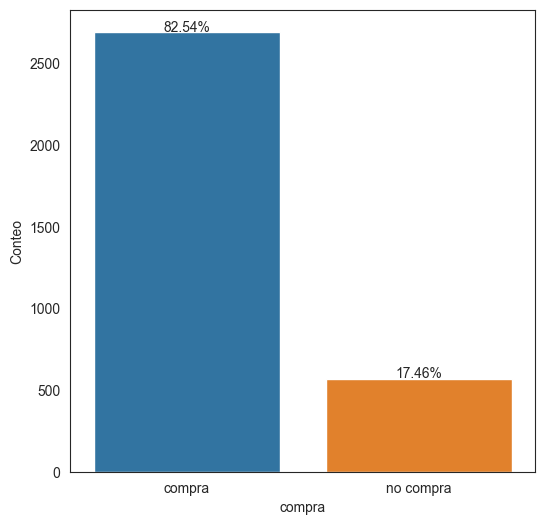

In [136]:
# Crea el count plot
fig = plt.figure(figsize=(6, 6))
ax = sns.countplot(x='compra', data=data)
ax.set_ylabel('Conteo')
ax.set_xticklabels(['compra', 'no compra'])

# Muestra los porcentajes en el gráfico
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format(height / len(data) * 100),
            ha='center')


Para representar las variables categóricas siempre es mejor usar un diagrama de barras o un _count plot_ que un _pie chart_ por que estos últimos pueden ser engañosos. Más información: [Don’t Trust Pie Charts](https://appsilon.com/dont-trust-pie-charts/).

### Valores ausentes

**Comprueba qué variables tienen valores ausentes y cuántos. Muestra solo las variables que tienen valores ausentes.**

In [137]:
# Calculamos el número de valores ausentes
null_series = data.isnull().sum()

# Filtramos por las variables que tienen valores ausentes
null_series[null_series > 0]


Series([], dtype: int64)

In [138]:
#sns.barplot(x=null_series_p.index, y=null_series_p.values);

### Duplicados

**Comprueba si hay valores duplicados. ¿Crees que podemos eliminarlos sin más?**

In [139]:
data[data.duplicated(keep=False)]


,district,neighborhood,rooms,area_m2,lift,prices,compra,eurometro
19,Nou Barris,la Trinitat Nova,2,76,0,125000,0,1644
20,Nou Barris,la Trinitat Nova,2,76,0,125000,0,1644
34,Nou Barris,la Prosperitat,3,77,0,139900,0,1816
35,Nou Barris,la Prosperitat,3,77,0,139900,0,1816
45,Sant Martí,el Besòs i el Maresme,2,52,0,99000,0,1903
...,...,...,...,...,...,...,...,...
3191,Eixample,la Dreta de l'Eixample,3,153,1,1495000,0,9771
3195,Eixample,la Dreta de l'Eixample,3,146,1,1430000,0,9794
3196,Eixample,la Dreta de l'Eixample,3,146,1,1430000,0,9794
3235,Sarrià-Sant Gervasi,les Tres Torres,3,200,1,2360000,0,11800


_Incluye aquí tus observaciones._

### Ajuste de los tipos de variables

**Como hemos comentado, la variable `capture_rate` parece que debería ser numérica pero vemos que es de tipo `Object`, necesitamos saber qué ocurre. Muestra los posibles valores que puede tomar esta variable.**

In [140]:
data['prices'].unique()

array([  230000,    49000,   150000,   130000,   390000,    69000,
          87000,    95000,   279900,   219900,   490000,   199900,
         200000,   175000,   239000,   120000,   450000,   125000,
         103000,   176000,   299000,   129999,   135000,    80000,
         259000,   155000,   195000,   142900,  1250000,   139900,
         119000,   190000,    79000,    76000,    99000,   330000,
         145000,   265000,   132000,   365000,   260000,   119500,
         140000,   149000,   114900,   325000,   158000,   139000,
         165000,    93000,   141000,   137000,   189000,   129000,
         180000,   199000,   134900,   156000,  1700000,   630000,
         235000,   107000,   399000,   115000,   185000,   161500,
         830000,   160000,   169000,   270000,   275000,   699000,
         189900,   675000,   395000,   152000,   169900,   170000,
         215000,   177000,   250000,   178000,   210000,   240000,
        1150000,   118000,   162000,   220000,   142000,   225

**Parece que hay algún Pokémon que tiene 2 valores para esta variable. Localiza qué Pokémon son, es decir, cómo se llaman.**

In [141]:
data['district']

0           Gràcia
1       Nou Barris
2       Nou Barris
3       Nou Barris
4         Eixample
           ...    
3260    Sant Martí
3261      Eixample
3262      Eixample
3263      Eixample
3264      Eixample
Name: district, Length: 3265, dtype: object

**Ahora que hemos localizado el Pokémon que está dando problemas, sustituye su `capture_rate` por el valor 30 y transforma esta columna en una de tipo numérico.**

In [142]:
# Cambiamos el capture_rate por '30'
type(data.loc[0, 'district'])

str

In [143]:
data[['district', 'neighborhood', 'lift']] = data[['district', 'neighborhood', 'lift']].apply(lambda x: pd.factorize(x.astype(str))[0])

In [144]:
print(data[['district', 'neighborhood', 'lift']].dtypes)

district        int64
neighborhood    int64
lift            int64
dtype: object


In [145]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Crear el DataFrame 'data' con tus datos
# data = pd.read_csv(r'C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\datos_precios_casas.csv', sep=';')

# # Scatter plot
# plt.figure(figsize=(10, 6))
# ax = sns.scatterplot(data=data, x='rooms', y='eurometro', hue='compra')

# # Configuración de ejes y leyenda
# ax.set_xlabel('Número de habitaciones')
# ax.set_ylabel('Costo del eurometro')
# ax.legend(title='Buena compra', labels=['No', 'Sí'])

# # Cambiar colores de los puntos
# # colors = {0: 'red', 1: 'blue'}
# # for lh in ax.legend_._children:
# #     lh.set_color(colors[lh.get_label()])

# # Mostramos el número de registros en el gráfico
# for p in ax.collections:
#     height = p.get_sizes()[0]
#     ax.text(p.get_offsets()[0][0], p.get_offsets()[0][1] + 50,
#             '{}'.format(int(height)),
#             ha='center')

# # Mostrar el gráfico
# plt.show()





In [146]:
# print(df_filtrado)

### Detección de valores atípicos

**Muestra la descripción de las siguientes variables numéricas:**

In [147]:
cols = ['district', 'neighborhood', 'rooms', 'area_m2', 'lift', 'prices', 'compra','eurometro']

numeric_cols = ['rooms', 'area_m2', 'prices']

numeric_data = data[numeric_cols]

description = numeric_data.describe()

print(description)


             rooms      area_m2        prices
count  3265.000000  3265.000000  3.265000e+03
mean      3.160796   121.566616  6.004200e+05
std       1.325257    92.721515  6.522661e+05
min       1.000000    20.000000  4.900000e+04
25%       2.000000    72.000000  2.799000e+05
50%       3.000000    93.000000  4.190000e+05
75%       4.000000   135.000000  6.550000e+05
max      13.000000   900.000000  1.200000e+07


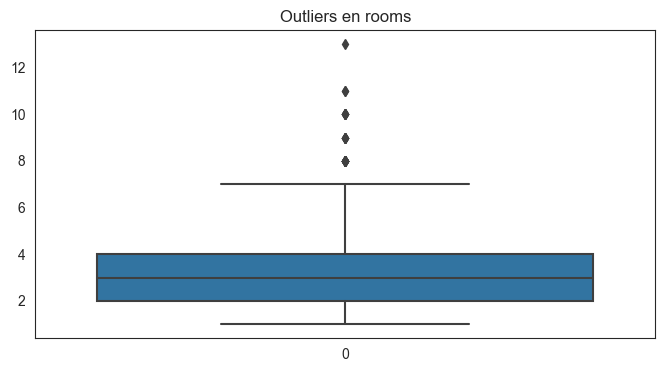

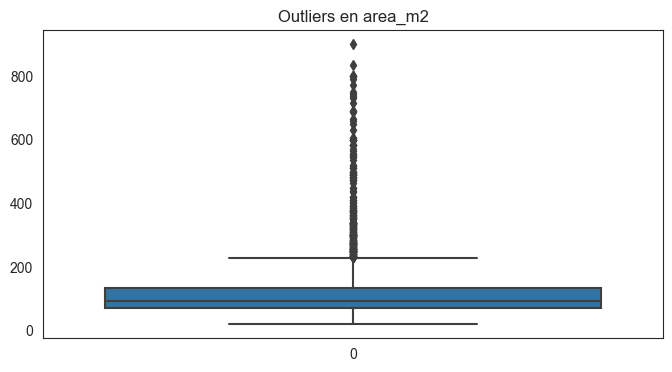

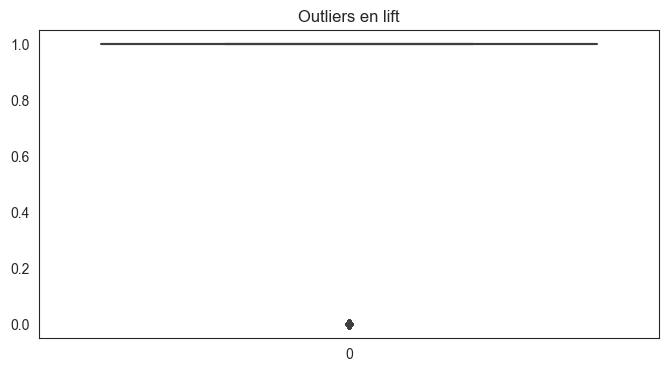

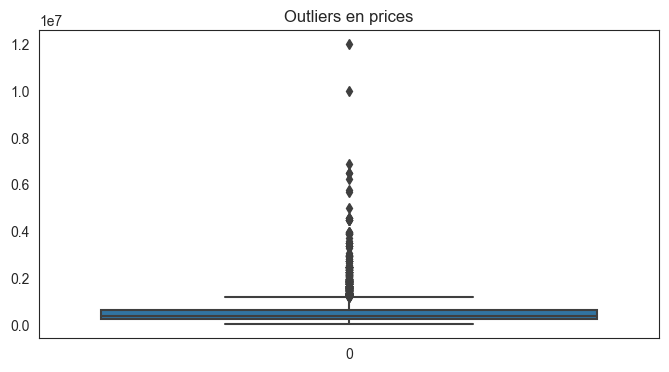

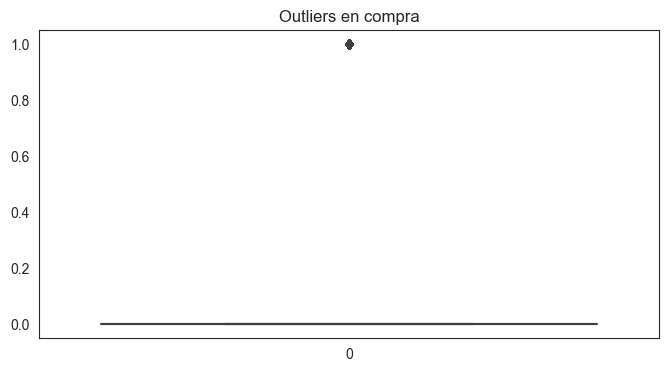

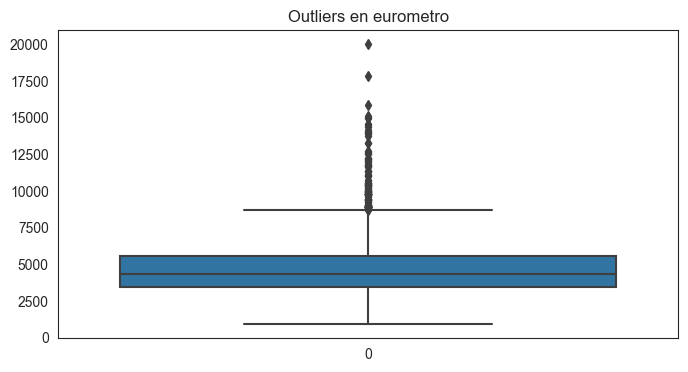

In [148]:
import pandas as pd
import seaborn as sns

# Cargar el DataFrame con tus datos
data = pd.read_csv(r'C:\Users\Ferran\OneDrive - es.logicalis.com\Escritorio\hkgn\hkgn pf\datos_precios_casas.csv', sep=';')

# Seleccionar columnas numéricas
numeric_columns = data.select_dtypes(include='number').columns

# Visualizar los outliers en cada columna numérica
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data[column])
    plt.title(f'Outliers en {column}')
    plt.show()


In [149]:
import plotly.express as px
import plotly.graph_objects as go

# Crear el gráfico de puntos
fig = px.scatter(data, x='area_m2', y='prices')

# Personalizar el diseño del gráfico de puntos
fig.update_layout(
    title='Relación entre Área y Precios',
    xaxis_title='Área (m²)',
    yaxis_title='eurometro'
)

# Identificar los outliers
Q1 = data['prices'].quantile(0.25)
Q3 = data['prices'].quantile(0.75)
IQR = Q3 - Q1

outliers = data[(data['prices'] < Q1 - 1.5 * IQR) | (data['eurometro'] > Q3 + 1.5 * IQR)]

# Añadir los outliers al gráfico de puntos
fig.add_trace(go.Scatter(x=outliers['area_m2'], y=outliers['eurometro'], mode='markers', 
                         marker=dict(color='red', size=8), name='Outliers'))

# Mostrar el gráfico de puntos
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### Estudio de la correlación

**Comprueba si existe alguna correlación entre los tipos de Pokémon y la variable que queremos predecir. Necesitarás convertir la variable categórica `type` numérica usando `pd.get_dummies()`. Interpreta los resultados.**

_Incluye aquí tus observaciones._

**Analiza usando un mapa de calor la correlación existente entre las variables `against_?` del conjunto de datos y la variable de salida. ¿Qué conclusiones sacas?**

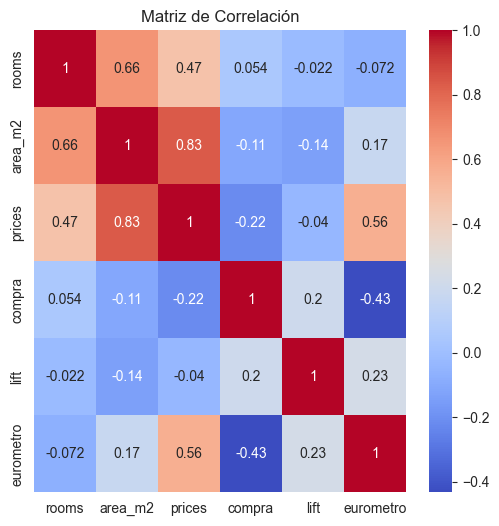

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
columns_to_plot = ['rooms', 'area_m2', 'prices', 'compra', 'lift','eurometro']

# Obtener la matriz de correlación
correlation_matrix = data[columns_to_plot].corr()

# Generar el mapa de calor
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


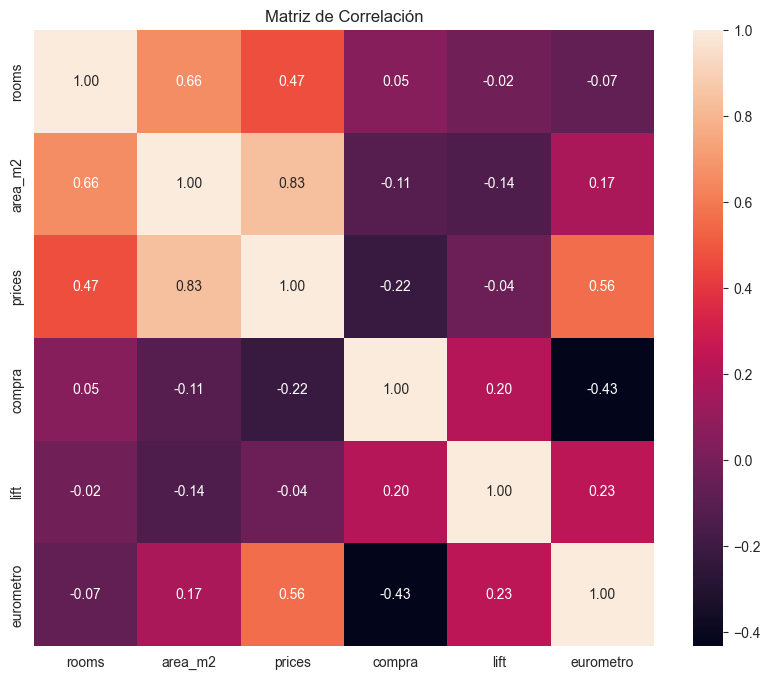

In [151]:
# Crea el mapa de calor con los índices de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # Tamaño de la figura ajustado a (10, 8)
sns.heatmap(data[columns_to_plot].corr(), annot=True, fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


_Incluye aquí tus observaciones._

**En base en a lo analizado hasta ahora, quédate con las columnas que consideres más informativas a efectos predictivos.**

In [152]:
data_f = data[['rooms', 'area_m2', 'prices', 'compra', 'lift','eurometro']]

**¿Por qué crees que no debemos usar variables como `name`, `japanese_name` o `pokedex_number`?**

_Incluye aquí tus observaciones._

**Crea un mapa de calor que muestre cómo se correlacionan las características seleccionadas y la variable a predecir, ¿qué observas?**

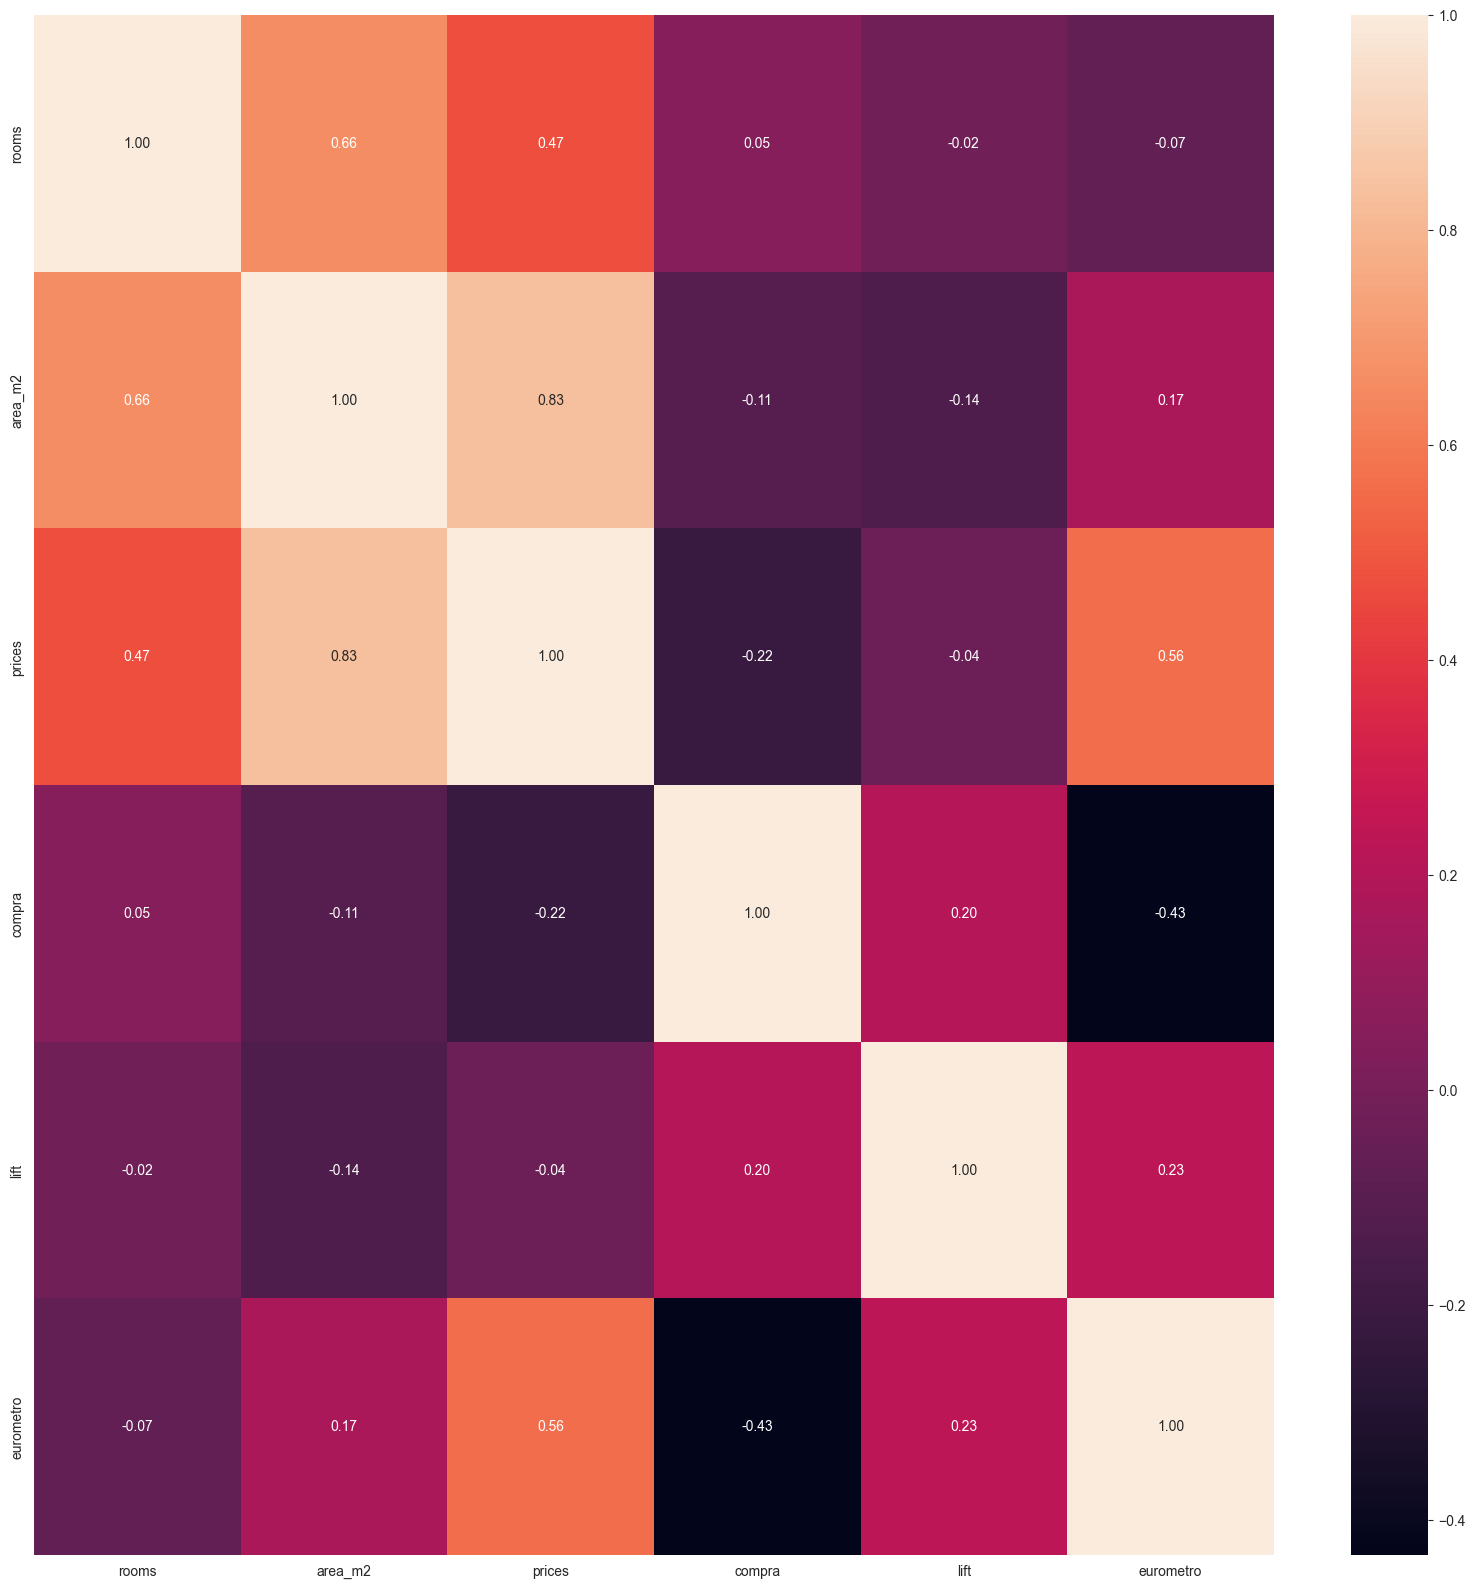

In [153]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_f.corr(), annot=True, fmt='.2f')
plt.yticks(va='center');

_Incluye aquí tus observaciones._

**Ahora que hemos seleccionado las características definitivas con las que vamos a entrenar nuestro modelo usan un _pair plot_ para mostrar su distribución en base a la variable de salida. Guarda la imagen en forma de PNG para poder visualizarla mejor.**

Un _pair plot_ muestra la relación bivariada entre cada par de características, es decir, crea gráficos con todas las combinaciones posibles de columnas numéricas.

In [154]:
data_f = data[['rooms', 'area_m2', 'prices', 'compra', 'lift','eurometro']]

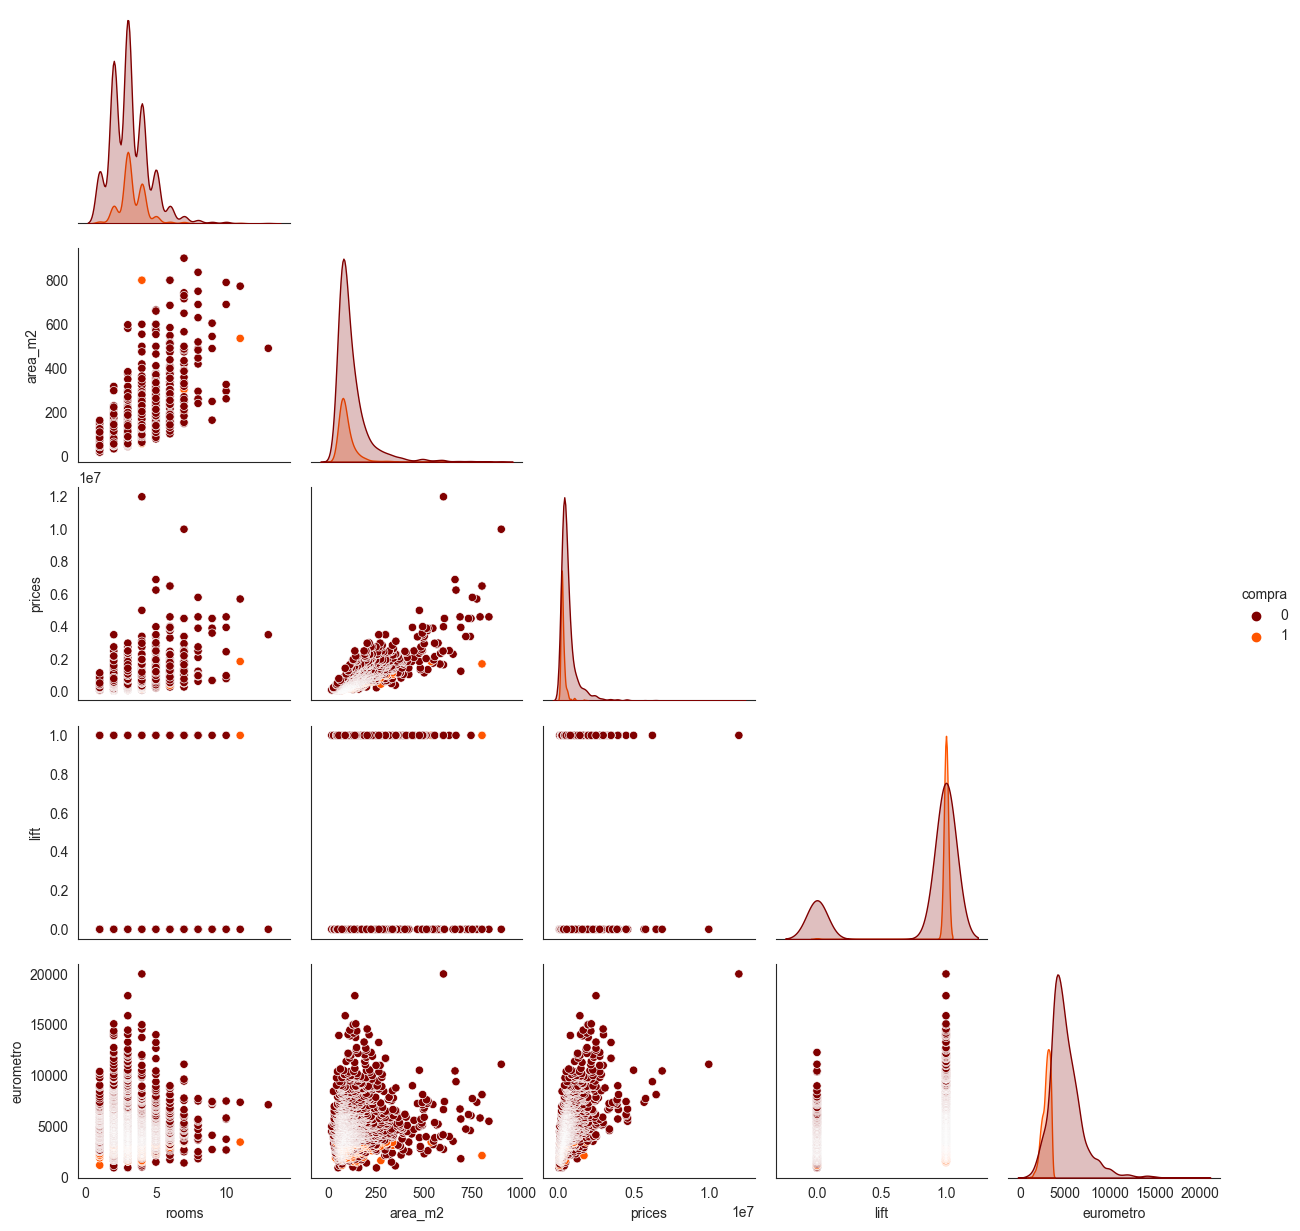

In [155]:
# Creamos el pair plot
sns.pairplot(data_f, hue='compra', palette='gist_heat', corner=True)
plt.savefig('compra_pair_plot.png');

## 4. División conjuntos de entrenamiento y prueba

**Separa las variables de entrada de la variable de salida y asígnalas a dos variables llamadas `X` e `y` respectivamente.**

In [156]:
X = data_f.drop('compra', axis=1)
y = data_f['compra']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=0)

In [158]:
# Instancia el escalador 
scaler = MinMaxScaler()

# Escala los datos
X_train_scaled = scaler.fit_transform(X_train)

In [159]:
# Recrea el dataset de entrenamiento con las columnas estandarizadas
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train.head()

,rooms,area_m2,prices,lift,eurometro
0,0.2,0.113971,0.051000,1.0,0.142975
1,0.3,0.205882,0.085258,1.0,0.133585
2,0.2,0.045343,0.017982,1.0,0.116341
3,0.3,0.158088,0.141218,1.0,0.325873
4,0.2,0.104167,0.159045,1.0,0.550050


In [160]:
# Escala el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

In [161]:
# Recrea el dataset de prueba con las columnas estandarizadas
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test.head()

,rooms,area_m2,prices,lift,eurometro
0,0.4,0.171569,0.111766,1.0,0.229611
1,0.1,0.105392,0.054410,1.0,0.168251
2,0.2,0.082108,0.080763,1.0,0.332310
3,0.2,0.089461,0.050535,1.0,0.183547
4,0.4,0.223039,0.178422,1.0,0.296226


In [162]:
# Instancia el clasificador
lr = LogisticRegression(max_iter=10000,random_state=42)

# Entrena el clasificador
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [163]:
# Imprime la exactitud en los set de entrenamiento y prueba
print(f'Accuracy of LR on training set: {lr.score(X_train, y_train):.2f}')
print(f'Accuracy of LR on test set: {lr.score(X_test, y_test):.2f}')

Accuracy of LR on training set: 0.90
Accuracy of LR on test set: 0.91


In [164]:
# Realiza las predicciones
y_pred_lr = lr.predict(X_test)

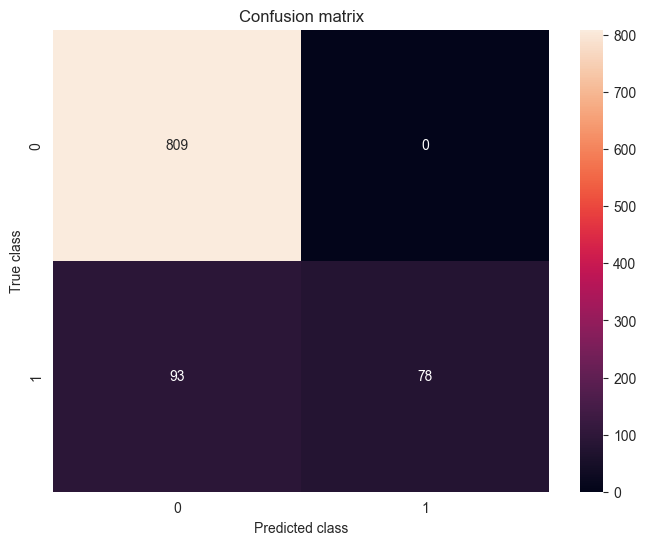

In [165]:
# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_lr, labels=[0, 1])
plt.figure(figsize=[8, 6])
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class');

In [166]:
# Imprime el informe de clasificación
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       809
           1       1.00      0.46      0.63       171

    accuracy                           0.91       980
   macro avg       0.95      0.73      0.79       980
weighted avg       0.91      0.91      0.89       980



In [167]:
new_data = {
    "name": ["1"],
    "rooms": ["2"],
    "area_m2": ["200"],
    "prices": ["30000"],
    "lift": ['1'],
    "eurometro" : ["1500"]
}

# Calcula el valor de la nueva clave "eurometro" como entero
# new_data["eurometro"] = int(new_data["prices"][0]) // int(new_data["area_m2"][0])

# Imprime el diccionario actualizado
print(new_data)





{'name': ['1'], 'rooms': ['2'], 'area_m2': ['200'], 'prices': ['30000'], 'lift': ['1'], 'eurometro': ['1500']}


In [168]:
# Crea un DataFrame con los nuevos datos
new_df = pd.DataFrame(new_data)

# Establece 'name' como índice
new_df.set_index('name', inplace=True)
new_df

,rooms,area_m2,prices,lift,eurometro
name,,,,,
1,2,200,30000,1,1500


In [169]:
# Escala los datos
new_df_scaled = scaler.transform(new_df)

In [170]:
# Recrea el dataset de prueba con las columnas estandarizadas
new_df = pd.DataFrame(new_df_scaled, 
                      columns=new_df.columns, 
                      index=new_df.index)
new_df.head()

,rooms,area_m2,prices,lift,eurometro
name,,,,,
1,0.1,0.220588,-0.002945,1.0,0.034016


In [171]:
leyenda = {1: 'COMPRA RECOMENDABLE',
           0: 'COMPRA NO RECOMENDABLE'}

In [172]:
# Haz las predicciones
y_new = lr.predict(new_df)

# Imprime los resultados
for i in range(len(new_df)):
    print(f"{new_df.index[i]} es una {leyenda[y_new[i]]}.")

1 es una COMPRA RECOMENDABLE.


In [173]:
# from sklearn.linear_model import LogisticRegression
# import joblib

# # Crear y entrenar el modelo
# model = LogisticRegression()
# # ...

# # Guardar el modelo en un archivo
# joblib.dump(model, 'modelo_logistic_regression.joblib')

# # Cargar el modelo desde el archivo
# loaded_model = joblib.load('modelo_logistic_regression.joblib')

# # Utilizar el modelo cargado para hacer predicciones
# # ...


In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import joblib
import numpy as np

iris = load_iris()
X_train = iris.data
y_train = iris.target

# Instanciar y ajustar el modelo
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Guardar el modelo entrenado
joblib.dump(lr, 'modelo_entrenado.joblib')

# Cargar el modelo entrenado
loaded_model = joblib.load('modelo_entrenado.joblib')

# Datos para hacer la predicción
new_data = {
    #"name": ["1"],
    "rooms": ["2"],
    "area_m2": ["200"],
    "prices": ["30000"],
    #"lift": ['1'],
    "eurometro" : ["150"]
}

# Convertir los valores a tipos numéricos
new_data = {key: np.array(value).astype(float) for key, value in new_data.items()}

# Convertir los datos a una matriz 2D
X_new = np.array(list(new_data.values())).reshape(1, -1)

# Ajustar el modelo nuevamente con los datos de entrenamiento
loaded_model.fit(X_train, y_train)

# Realizar la predicción
prediction = loaded_model.predict(X_new)

# Imprimir la predicción
print(prediction)


[2]
